In [11]:
from ffnn.healthcheck import healthcheck
healthcheck()

Healthcheck


In [12]:
from ffnn.ffnn import FFNN
from ffnn.types import ActivationFunction, LossFunction, WeightInitializer, WeightsSetup
import numpy as np

In [13]:
# 2 node di input layer, 2 node di hidden layer, 2 node di output layer
layer_sizes = [2, 2, 2]

activation_functions = [
    ActivationFunction.SIGMOID, 
    ActivationFunction.SOFTMAX
]

loss_function = LossFunction.CATEGORICAL_CROSS_ENTROPY

weights_setup = [
    WeightsSetup(initializer=WeightInitializer.UNIFORM, lower_bound=0, upper_bound=1, seed=1),
    WeightsSetup(initializer=WeightInitializer.NORMAL, mean=0, variance=1, seed=1),
]

model = FFNN(
    layer_sizes=layer_sizes, 
    activation_functions=activation_functions, 
    loss_function=loss_function, 
    weights_setup=weights_setup,
    epochs=2,
    learning_rate=0.5,
    verbose=True,
    random_state=42,
    batch_size=1
)

In [14]:
# Inisialisasi 10 data dummy untuk input dan target
dummy_size = 10
input_data = np.random.uniform(0.01, 0.1, (dummy_size, 2))  # 10 sampel, 2 fitur
target_data = np.random.uniform(0.01, 1.0, (dummy_size, 2))  # 10 sampel, 2 output

# Inisialisasi bobot dan bias
weights = [
    np.random.uniform(0.1, 0.3, (2, 2)),  # Bobot layer pertama (2 input -> 2 hidden)
    np.random.uniform(0.4, 0.6, (2, 2)),  # Bobot layer kedua (2 hidden -> 2 output)
]

biases = [
    np.random.uniform(0.3, 0.4, (2,)),  # Bias layer pertama
    np.random.uniform(0.6, 0.7, (2,)),  # Bias layer kedua
]

# Set bobot dan bias ke model
model.set_weights(weights)
model.set_biases(biases)

In [15]:
model.fit(input_data, target_data)
model.show_graph()

Training...: 100%|██████████| 2/2 [00:00<00:00, 666.56it/s]

Epoch 1 - Training Loss: 0.592965706185612, Validation Loss: 0.8316758778397824
Epoch 2 - Training Loss: 0.6117087972780744, Validation Loss: 0.8654910363014117


In [16]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import warnings 

In [17]:
# warnings.filterwarnings('ignore') 

In [18]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = np.eye(10)[y.astype(int)]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)
print(X_train.shape, X_test.shape)

(21000, 784) (49000, 784)


In [20]:
layer_sizes = [784, 256, 128, 10]
# layer_sizes = [784, 50, 10]
# layer_sizes = [784, 10]

activation_functions = [
    ActivationFunction.RELU,
    ActivationFunction.RELU,
    ActivationFunction.SOFTMAX,
]

loss_function = LossFunction.CATEGORICAL_CROSS_ENTROPY

weights_setup = [
    # WeightsSetup(initializer=WeightInitializer.ZERO),
    # WeightsSetup(initializer=WeightInitializer.ZERO),
    WeightsSetup(WeightInitializer.XAVIER, seed=42),
    WeightsSetup(WeightInitializer.XAVIER, seed=42),
    WeightsSetup(WeightInitializer.XAVIER, seed=42),
    # WeightsSetup(WeightInitializer.NORMAL, mean=0, variance=1, seed=42),
    # WeightsSetup(WeightInitializer.NORMAL, mean=0, variance=1, seed=42),
    # WeightsSetup(WeightInitializer.NORMAL, mean=0, variance=1, seed=42),
    # WeightsSetup(WeightInitializer.UNIFORM, lower_bound=0, upper_bound=1, seed=42),
    # WeightsSetup(WeightInitializer.UNIFORM, lower_bound=0, upper_bound=1, seed=42),
    # WeightsSetup(WeightInitializer.UNIFORM, lower_bound=0, upper_bound=1, seed=42),
]

model = FFNN(
    layer_sizes=layer_sizes, 
    activation_functions=activation_functions, 
    loss_function=loss_function, 
    weights_setup=weights_setup,
    # epochs=100,
    verbose=True,
    learning_rate=0.001,
    # batch_size=256,
    random_state=42,
    # l1_lambda=0.0001,  # L1 regularization
    # l2_lambda=0.0001,  # L2 regularization
)

In [21]:
model.fit(X_train, y_train)

Training...:   1%|          | 1/100 [00:00<01:15,  1.32it/s]

Epoch 1 - Training Loss: 6.419046988646672, Validation Loss: 2.3391355263393034


Training...:   2%|▏         | 2/100 [00:01<01:10,  1.39it/s]

Epoch 2 - Training Loss: 1.9653920213072928, Validation Loss: 1.393794738090477


Training...:   3%|▎         | 3/100 [00:02<01:05,  1.49it/s]

Epoch 3 - Training Loss: 1.269845889922393, Validation Loss: 1.411184002869399


Training...:   4%|▍         | 4/100 [00:02<01:00,  1.58it/s]

Epoch 4 - Training Loss: 0.9273581148922794, Validation Loss: 1.1674278541601686


Training...:   5%|▌         | 5/100 [00:03<00:59,  1.59it/s]

Epoch 5 - Training Loss: 0.7747511642879106, Validation Loss: 0.9821247059694784


Training...:   6%|▌         | 6/100 [00:03<00:57,  1.63it/s]

Epoch 6 - Training Loss: 0.7005948557704386, Validation Loss: 0.7530581157804709


Training...:   7%|▋         | 7/100 [00:04<00:58,  1.60it/s]

Epoch 7 - Training Loss: 0.6060723683101338, Validation Loss: 0.7161888746422563


Training...:   8%|▊         | 8/100 [00:05<00:58,  1.57it/s]

Epoch 8 - Training Loss: 0.573298616398117, Validation Loss: 0.6842329616039176


Training...:   9%|▉         | 9/100 [00:05<00:56,  1.61it/s]

Epoch 9 - Training Loss: 0.45380820443435893, Validation Loss: 0.5017060315796056


Training...:  10%|█         | 10/100 [00:06<00:55,  1.62it/s]

Epoch 10 - Training Loss: 0.37292094875910614, Validation Loss: 0.4562250936060469


Training...:  11%|█         | 11/100 [00:06<00:53,  1.67it/s]

Epoch 11 - Training Loss: 0.3554114684310537, Validation Loss: 0.519670339062469


Training...:  12%|█▏        | 12/100 [00:07<00:53,  1.65it/s]

Epoch 12 - Training Loss: 0.3661400174422739, Validation Loss: 0.2989327200403125


Training...:  13%|█▎        | 13/100 [00:08<00:54,  1.59it/s]

Epoch 13 - Training Loss: 0.31058525977464696, Validation Loss: 0.30537349630677046


Training...:  14%|█▍        | 14/100 [00:08<00:56,  1.52it/s]

Epoch 14 - Training Loss: 0.3229469646379725, Validation Loss: 0.37240174031553436


Training...:  15%|█▌        | 15/100 [00:09<00:56,  1.51it/s]

Epoch 15 - Training Loss: 0.2796971868599527, Validation Loss: 0.24893509404299688


Training...:  16%|█▌        | 16/100 [00:10<00:54,  1.55it/s]

Epoch 16 - Training Loss: 0.28570628697096057, Validation Loss: 0.18845586377349716


Training...:  17%|█▋        | 17/100 [00:10<00:51,  1.61it/s]

Epoch 17 - Training Loss: 0.2665367834507899, Validation Loss: 0.15700726326566455


Training...:  18%|█▊        | 18/100 [00:11<00:49,  1.65it/s]

Epoch 18 - Training Loss: 0.2508173827466067, Validation Loss: 0.15775066490966663


Training...:  19%|█▉        | 19/100 [00:11<00:47,  1.70it/s]

Epoch 19 - Training Loss: 0.22255014098291176, Validation Loss: 0.2220585674642567


Training...:  20%|██        | 20/100 [00:12<00:47,  1.70it/s]

Epoch 20 - Training Loss: 0.21419840859476477, Validation Loss: 0.22898489391124374


Training...:  21%|██        | 21/100 [00:13<00:45,  1.74it/s]

Epoch 21 - Training Loss: 0.1596697264012456, Validation Loss: 0.2877031811224179


Training...:  22%|██▏       | 22/100 [00:13<00:44,  1.75it/s]

Epoch 22 - Training Loss: 0.17088874815012797, Validation Loss: 0.13699510484456243


Training...:  23%|██▎       | 23/100 [00:14<00:43,  1.77it/s]

Epoch 23 - Training Loss: 0.1410481379797477, Validation Loss: 0.17059901178817338


Training...:  24%|██▍       | 24/100 [00:14<00:42,  1.77it/s]

Epoch 24 - Training Loss: 0.13682902533500174, Validation Loss: 0.11907910349076108


Training...:  25%|██▌       | 25/100 [00:15<00:42,  1.77it/s]

Epoch 25 - Training Loss: 0.1364427921510162, Validation Loss: 0.1528439239784428


Training...:  26%|██▌       | 26/100 [00:15<00:41,  1.77it/s]

Epoch 26 - Training Loss: 0.1317833738597429, Validation Loss: 0.18769829374220873


Training...:  27%|██▋       | 27/100 [00:16<00:41,  1.76it/s]

Epoch 27 - Training Loss: 0.11169934809389015, Validation Loss: 0.23379819666207713


Training...:  28%|██▊       | 28/100 [00:16<00:41,  1.75it/s]

Epoch 28 - Training Loss: 0.13496507213564168, Validation Loss: 0.08590392296101472


Training...:  29%|██▉       | 29/100 [00:17<00:40,  1.74it/s]

Epoch 29 - Training Loss: 0.09307711433672483, Validation Loss: 0.1025793459135


Training...:  30%|███       | 30/100 [00:18<00:40,  1.75it/s]

Epoch 30 - Training Loss: 0.1040293722752248, Validation Loss: 0.17622342744895983


Training...:  31%|███       | 31/100 [00:18<00:40,  1.72it/s]

Epoch 31 - Training Loss: 0.15551771582787072, Validation Loss: 0.08713114155538572


Training...:  32%|███▏      | 32/100 [00:19<00:39,  1.73it/s]

Epoch 32 - Training Loss: 0.12672694507173696, Validation Loss: 0.12149684061348327


Training...:  33%|███▎      | 33/100 [00:19<00:38,  1.72it/s]

Epoch 33 - Training Loss: 0.08944578742841992, Validation Loss: 0.040938137314713643


Training...:  34%|███▍      | 34/100 [00:20<00:38,  1.72it/s]

Epoch 34 - Training Loss: 0.0798294741568908, Validation Loss: 0.10015808643772937


Training...:  35%|███▌      | 35/100 [00:21<00:37,  1.71it/s]

Epoch 35 - Training Loss: 0.0946225687111904, Validation Loss: 0.21418175517407262


Training...:  36%|███▌      | 36/100 [00:21<00:37,  1.72it/s]

Epoch 36 - Training Loss: 0.0700990940148883, Validation Loss: 0.11705451421245465


Training...:  37%|███▋      | 37/100 [00:22<00:36,  1.73it/s]

Epoch 37 - Training Loss: 0.06870063035698398, Validation Loss: 0.13291849572445605


Training...:  38%|███▊      | 38/100 [00:22<00:35,  1.74it/s]

Epoch 38 - Training Loss: 0.06250414084448942, Validation Loss: 0.11177686618778082


Training...:  39%|███▉      | 39/100 [00:23<00:35,  1.73it/s]

Epoch 39 - Training Loss: 0.044179652753527414, Validation Loss: 0.07887776738565454


Training...:  40%|████      | 40/100 [00:23<00:34,  1.74it/s]

Epoch 40 - Training Loss: 0.052415654177056105, Validation Loss: 0.027890062344970136


Training...:  41%|████      | 41/100 [00:24<00:33,  1.75it/s]

Epoch 41 - Training Loss: 0.058443299783013956, Validation Loss: 0.06168771415918815


Training...:  42%|████▏     | 42/100 [00:25<00:32,  1.77it/s]

Epoch 42 - Training Loss: 0.04165906450747656, Validation Loss: 0.06578634063282761


Training...:  43%|████▎     | 43/100 [00:25<00:32,  1.75it/s]

Epoch 43 - Training Loss: 0.042296513917296365, Validation Loss: 0.07845606821939467


Training...:  44%|████▍     | 44/100 [00:26<00:32,  1.74it/s]

Epoch 44 - Training Loss: 0.042317902130564904, Validation Loss: 0.025130914751605487


Training...:  45%|████▌     | 45/100 [00:26<00:31,  1.74it/s]

Epoch 45 - Training Loss: 0.042882862280691006, Validation Loss: 0.03302754581309821


Training...:  46%|████▌     | 46/100 [00:27<00:31,  1.72it/s]

Epoch 46 - Training Loss: 0.028715270719186083, Validation Loss: 0.0718541727725314


Training...:  47%|████▋     | 47/100 [00:27<00:30,  1.72it/s]

Epoch 47 - Training Loss: 0.035074732940673536, Validation Loss: 0.07625323388045625


Training...:  48%|████▊     | 48/100 [00:28<00:29,  1.74it/s]

Epoch 48 - Training Loss: 0.03330028884046284, Validation Loss: 0.021799808642162508


Training...:  49%|████▉     | 49/100 [00:29<00:29,  1.74it/s]

Epoch 49 - Training Loss: 0.04361786334449958, Validation Loss: 0.027871917634475486


Training...:  50%|█████     | 50/100 [00:29<00:28,  1.73it/s]

Epoch 50 - Training Loss: 0.02782696347722286, Validation Loss: 0.008035812812665102


Training...:  51%|█████     | 51/100 [00:30<00:28,  1.72it/s]

Epoch 51 - Training Loss: 0.01759907184289731, Validation Loss: 0.008592663763631561


Training...:  52%|█████▏    | 52/100 [00:30<00:27,  1.74it/s]

Epoch 52 - Training Loss: 0.025963484778096912, Validation Loss: 0.06226867300488134


Training...:  53%|█████▎    | 53/100 [00:31<00:27,  1.74it/s]

Epoch 53 - Training Loss: 0.031106737443778943, Validation Loss: 0.04529803081748203


Training...:  54%|█████▍    | 54/100 [00:31<00:26,  1.74it/s]

Epoch 54 - Training Loss: 0.03175650539515916, Validation Loss: 0.04814550849941014


Training...:  55%|█████▌    | 55/100 [00:32<00:25,  1.75it/s]

Epoch 55 - Training Loss: 0.0292542253546615, Validation Loss: 0.06286317472161632


Training...:  56%|█████▌    | 56/100 [00:33<00:25,  1.76it/s]

Epoch 56 - Training Loss: 0.048571392327452514, Validation Loss: 0.023940901101890247


Training...:  57%|█████▋    | 57/100 [00:33<00:24,  1.76it/s]

Epoch 57 - Training Loss: 0.020695320006359333, Validation Loss: 0.036797951667392116


Training...:  58%|█████▊    | 58/100 [00:34<00:23,  1.75it/s]

Epoch 58 - Training Loss: 0.004878931227254414, Validation Loss: 0.01081422931784253


Training...:  59%|█████▉    | 59/100 [00:34<00:23,  1.76it/s]

Epoch 59 - Training Loss: 0.007499281883601725, Validation Loss: 0.003024313567931857


Training...:  60%|██████    | 60/100 [00:35<00:22,  1.78it/s]

Epoch 60 - Training Loss: 0.005390537301483797, Validation Loss: 0.0009190370372442336


Training...:  61%|██████    | 61/100 [00:35<00:21,  1.78it/s]

Epoch 61 - Training Loss: 0.010237309205196601, Validation Loss: 0.022649188403150302


Training...:  62%|██████▏   | 62/100 [00:36<00:21,  1.77it/s]

Epoch 62 - Training Loss: 0.014812507746711459, Validation Loss: 0.001255247329654528


Training...:  63%|██████▎   | 63/100 [00:37<00:20,  1.79it/s]

Epoch 63 - Training Loss: 0.02965211307281062, Validation Loss: 0.01467370751115444


Training...:  64%|██████▍   | 64/100 [00:37<00:20,  1.79it/s]

Epoch 64 - Training Loss: 0.030987607505589716, Validation Loss: 0.0107303428311456


Training...:  65%|██████▌   | 65/100 [00:38<00:19,  1.81it/s]

Epoch 65 - Training Loss: 0.018792011094221274, Validation Loss: 0.012249182379962299


Training...:  66%|██████▌   | 66/100 [00:38<00:18,  1.80it/s]

Epoch 66 - Training Loss: 0.008903117441075283, Validation Loss: 0.04421945909823496


Training...:  67%|██████▋   | 67/100 [00:39<00:19,  1.73it/s]

Epoch 67 - Training Loss: 0.016096069803469417, Validation Loss: 0.003831505378721066


Training...:  68%|██████▊   | 68/100 [00:39<00:18,  1.73it/s]

Epoch 68 - Training Loss: 0.011451586172747054, Validation Loss: 0.024814327563230265


Training...:  69%|██████▉   | 69/100 [00:40<00:18,  1.70it/s]

Epoch 69 - Training Loss: 0.012019451360275548, Validation Loss: 0.005085411306245745


Training...:  70%|███████   | 70/100 [00:41<00:18,  1.63it/s]

Epoch 70 - Training Loss: 0.004662938759948563, Validation Loss: 0.00866455027365354


Training...:  71%|███████   | 71/100 [00:41<00:18,  1.59it/s]

Epoch 71 - Training Loss: 0.002858089750590586, Validation Loss: 0.008284093715881402


Training...:  72%|███████▏  | 72/100 [00:42<00:17,  1.64it/s]

Epoch 72 - Training Loss: 0.008181673433214114, Validation Loss: 0.009941949200304598


Training...:  73%|███████▎  | 73/100 [00:43<00:16,  1.66it/s]

Epoch 73 - Training Loss: 0.00988047173632555, Validation Loss: 0.00333772343903974


Training...:  74%|███████▍  | 74/100 [00:43<00:15,  1.67it/s]

Epoch 74 - Training Loss: 0.00505132699857836, Validation Loss: 0.01081339086333865


Training...:  75%|███████▌  | 75/100 [00:44<00:14,  1.67it/s]

Epoch 75 - Training Loss: 0.006445813296826426, Validation Loss: 0.0027503541832821043


Training...:  76%|███████▌  | 76/100 [00:44<00:14,  1.68it/s]

Epoch 76 - Training Loss: 0.0024050698126333358, Validation Loss: 2.1462855892780854e-07


Training...:  77%|███████▋  | 77/100 [00:45<00:13,  1.69it/s]

Epoch 77 - Training Loss: 0.017039746670537776, Validation Loss: 0.022763012533797002


Training...:  78%|███████▊  | 78/100 [00:45<00:12,  1.71it/s]

Epoch 78 - Training Loss: 0.01830487473029943, Validation Loss: 0.005988004996587023


Training...:  79%|███████▉  | 79/100 [00:46<00:12,  1.71it/s]

Epoch 79 - Training Loss: 0.011639765023473404, Validation Loss: 0.004496948928921125


Training...:  80%|████████  | 80/100 [00:47<00:11,  1.72it/s]

Epoch 80 - Training Loss: 0.0020329313340983093, Validation Loss: 0.005687842940153025


Training...:  81%|████████  | 81/100 [00:47<00:11,  1.72it/s]

Epoch 81 - Training Loss: 0.0010934567922838792, Validation Loss: 2.52597286117942e-06


Training...:  82%|████████▏ | 82/100 [00:48<00:10,  1.74it/s]

Epoch 82 - Training Loss: 0.0028210498390100983, Validation Loss: 0.0009199500356592425


Training...:  83%|████████▎ | 83/100 [00:48<00:09,  1.75it/s]

Epoch 83 - Training Loss: 0.007793422609264542, Validation Loss: 0.007955852241431551


Training...:  84%|████████▍ | 84/100 [00:49<00:09,  1.72it/s]

Epoch 84 - Training Loss: 0.004690660616635409, Validation Loss: 1.435131382747356e-05


Training...:  85%|████████▌ | 85/100 [00:49<00:08,  1.75it/s]

Epoch 85 - Training Loss: 0.01137893587099057, Validation Loss: 1.4262915377389708e-05


Training...:  86%|████████▌ | 86/100 [00:50<00:07,  1.78it/s]

Epoch 86 - Training Loss: 0.0001260712670621876, Validation Loss: 0.00393477505206071


Training...:  87%|████████▋ | 87/100 [00:51<00:07,  1.73it/s]

Epoch 87 - Training Loss: 0.0003533616636408922, Validation Loss: 0.005387021739629607


Training...:  88%|████████▊ | 88/100 [00:51<00:07,  1.66it/s]

Epoch 88 - Training Loss: 0.002110062690923158, Validation Loss: 0.002441398722800739


Training...:  89%|████████▉ | 89/100 [00:52<00:06,  1.60it/s]

Epoch 89 - Training Loss: 0.0029541488324708286, Validation Loss: 0.009196419867001204


Training...:  90%|█████████ | 90/100 [00:53<00:06,  1.63it/s]

Epoch 90 - Training Loss: 0.004477612118968788, Validation Loss: 0.0014350998896392512


Training...:  91%|█████████ | 91/100 [00:53<00:05,  1.65it/s]

Epoch 91 - Training Loss: 0.00579497543330473, Validation Loss: 0.006333517205699176


Training...:  92%|█████████▏| 92/100 [00:54<00:04,  1.68it/s]

Epoch 92 - Training Loss: 0.005128015758178458, Validation Loss: 0.0021579587315953275


Training...:  93%|█████████▎| 93/100 [00:54<00:04,  1.70it/s]

Epoch 93 - Training Loss: 0.003270490902299104, Validation Loss: 0.004822284370797363


Training...:  94%|█████████▍| 94/100 [00:55<00:03,  1.72it/s]

Epoch 94 - Training Loss: 0.003358224891082798, Validation Loss: 0.002309347394070165


Training...:  95%|█████████▌| 95/100 [00:55<00:02,  1.72it/s]

Epoch 95 - Training Loss: 7.71604665658933e-06, Validation Loss: 2.7579160343784715e-09


Training...:  96%|█████████▌| 96/100 [00:56<00:02,  1.73it/s]

Epoch 96 - Training Loss: 4.527556129119148e-09, Validation Loss: 1.7753561196513266e-06


Training...:  97%|█████████▋| 97/100 [00:57<00:01,  1.75it/s]

Epoch 97 - Training Loss: 4.3953738485208414e-07, Validation Loss: 3.171303104257313e-08


Training...:  98%|█████████▊| 98/100 [00:57<00:01,  1.76it/s]

Epoch 98 - Training Loss: 1.4851367082679329e-08, Validation Loss: 3.3280102277060002e-09


Training...:  99%|█████████▉| 99/100 [00:58<00:00,  1.75it/s]

Epoch 99 - Training Loss: 9.926942838339143e-09, Validation Loss: 1.3951691180894809e-09


Training...: 100%|██████████| 100/100 [00:58<00:00,  1.70it/s]

Epoch 100 - Training Loss: 8.374994347475092e-09, Validation Loss: 4.8175598845254915e-12


In [22]:
y_pred = model.predict(X_test)
y_true = y_test

accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1))

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.77%


In [23]:
import pandas as pd

In [24]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.000000e+00,1.029217e-282,1.016689e-133,5.742578e-235,3.413955e-168,2.200436e-140,2.143496e-80,5.570616e-157,9.084247e-157,2.925180e-115
1,1.750645e-177,8.896593e-117,1.284059e-99,1.948284e-162,1.000000e+00,3.300032e-102,1.120887e-220,3.076369e-79,1.018238e-139,8.071147e-87
2,1.531225e-136,1.000000e+00,2.855197e-100,2.751535e-84,6.020972e-68,8.057109e-79,1.588502e-118,1.561384e-59,8.798306e-53,1.842607e-80
3,8.648912e-92,1.356211e-185,1.000000e+00,1.085120e-118,2.784808e-159,1.165814e-162,2.899031e-158,3.183589e-162,6.851849e-137,4.720819e-147
4,7.810145e-90,1.803809e-105,1.553929e-101,7.645458e-119,9.000231e-28,3.679671e-80,3.795809e-93,1.000000e+00,3.463991e-142,1.933393e-55


In [25]:
y_true_df = pd.DataFrame(y_true)
y_true_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


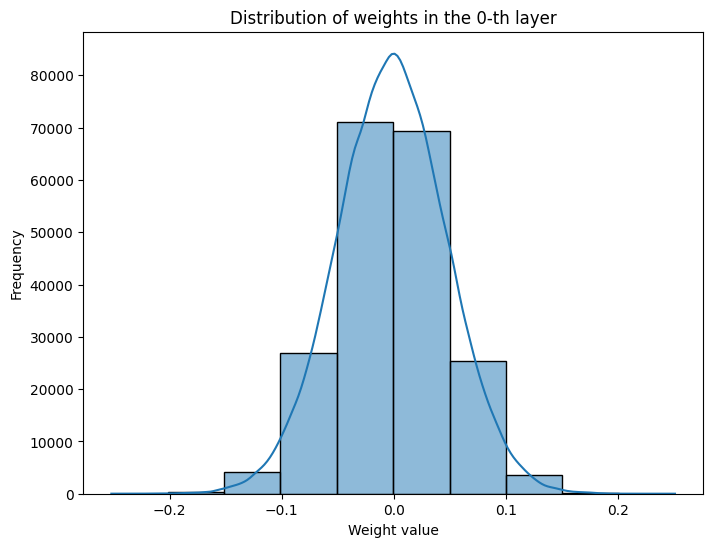

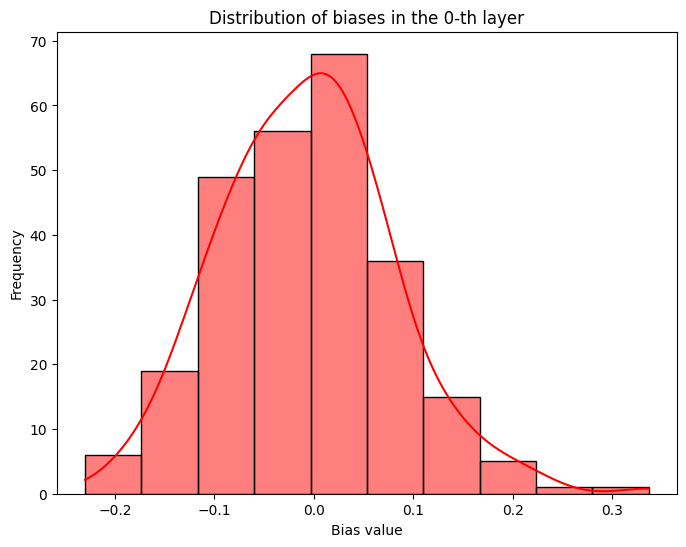

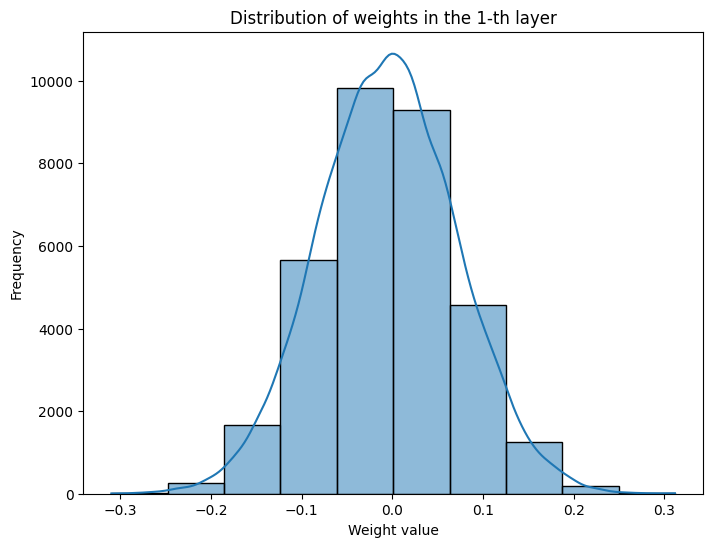

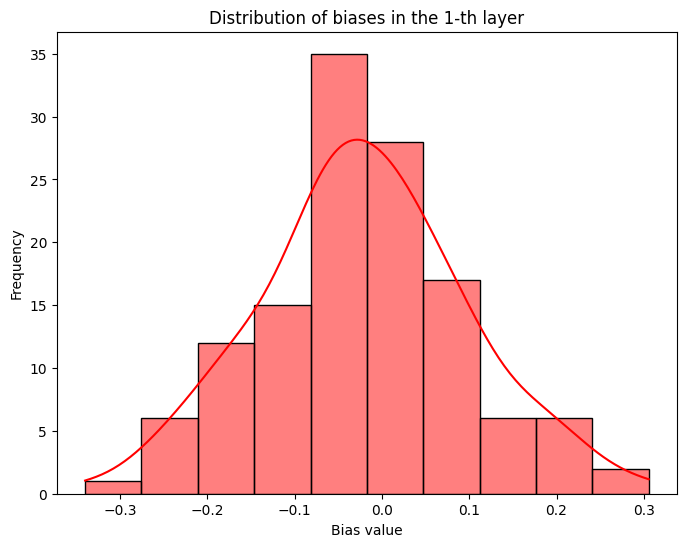

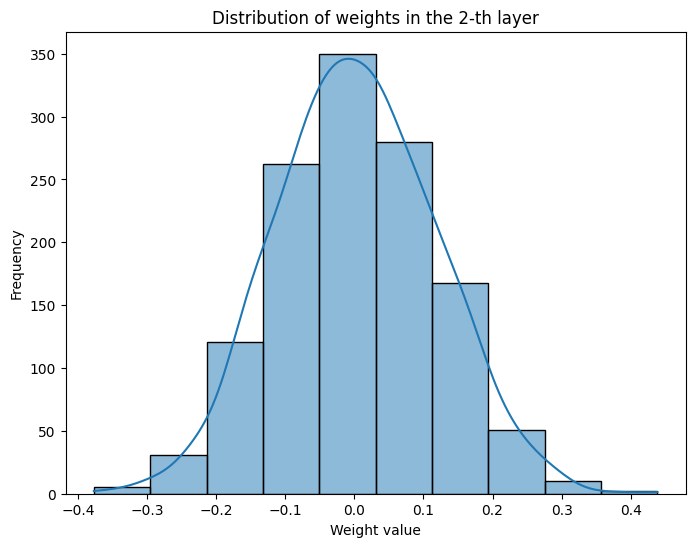

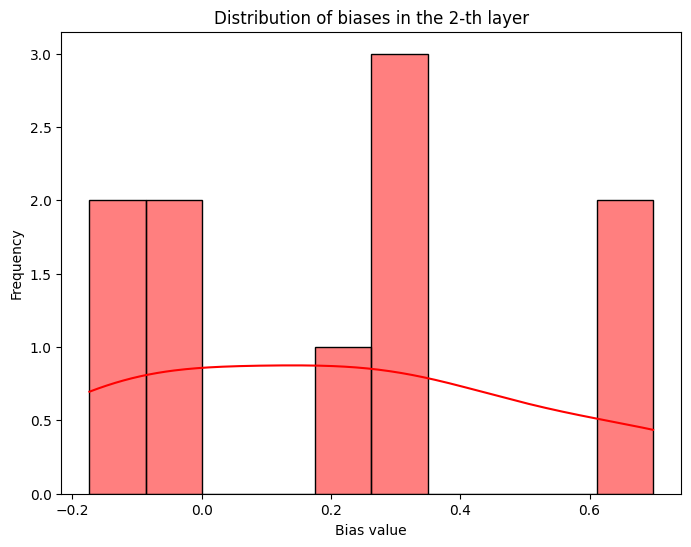

In [26]:
model.plot_weights([i for i in range(len(layer_sizes) - 1)])

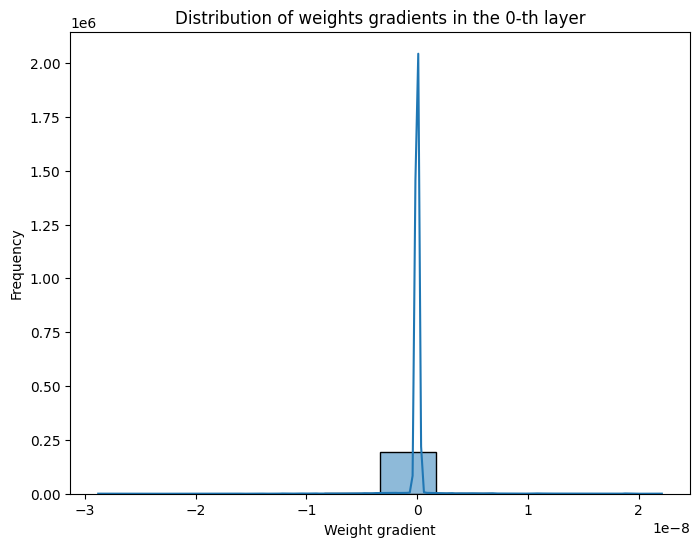

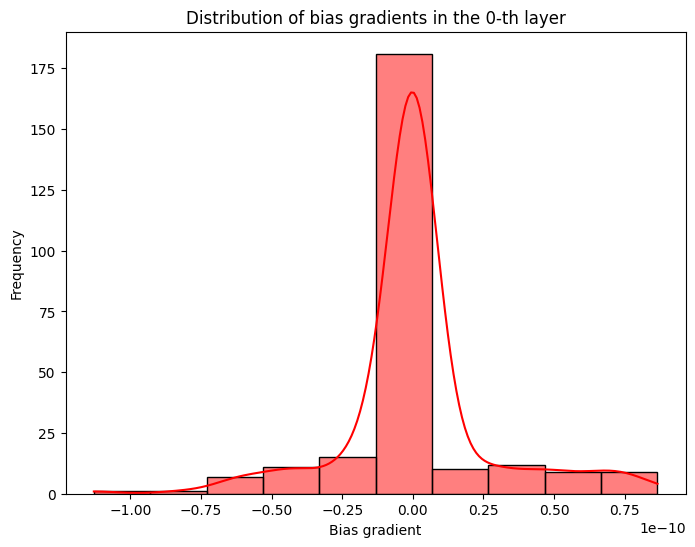

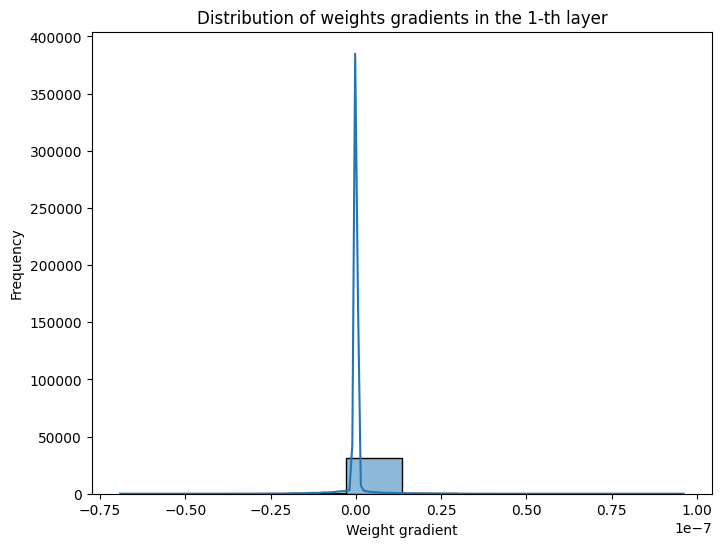

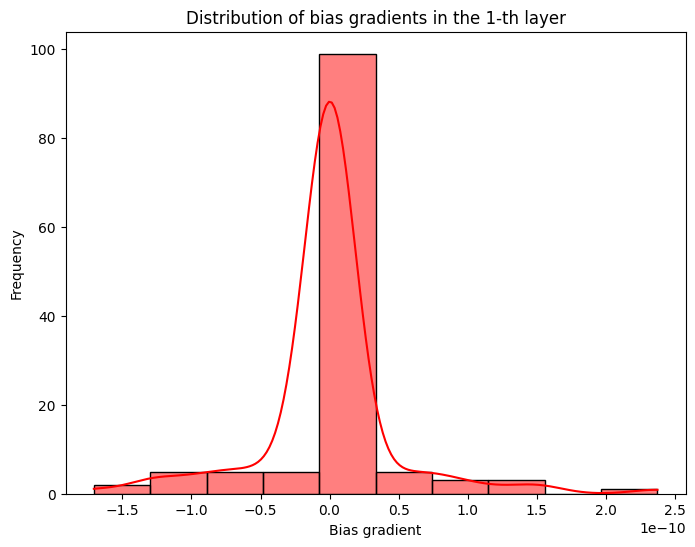

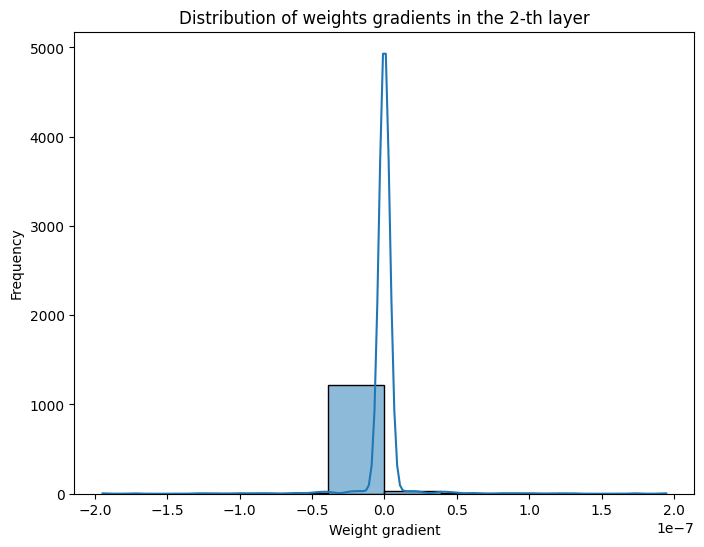

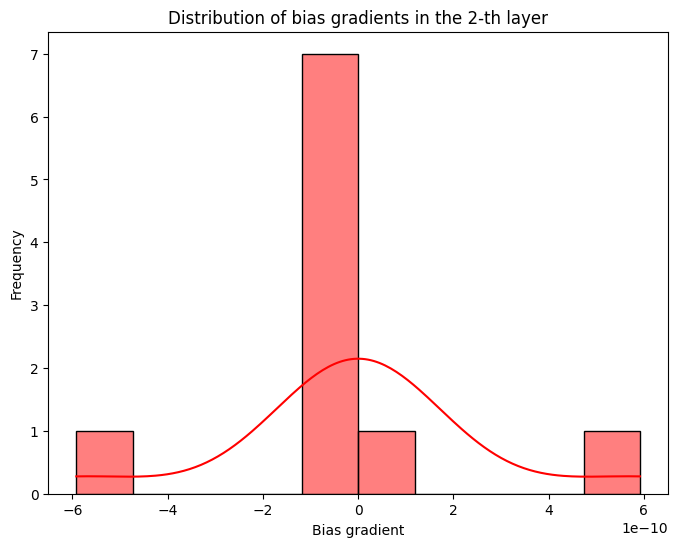

In [27]:
model.plot_gradients([i for i in range(len(layer_sizes) - 1)])

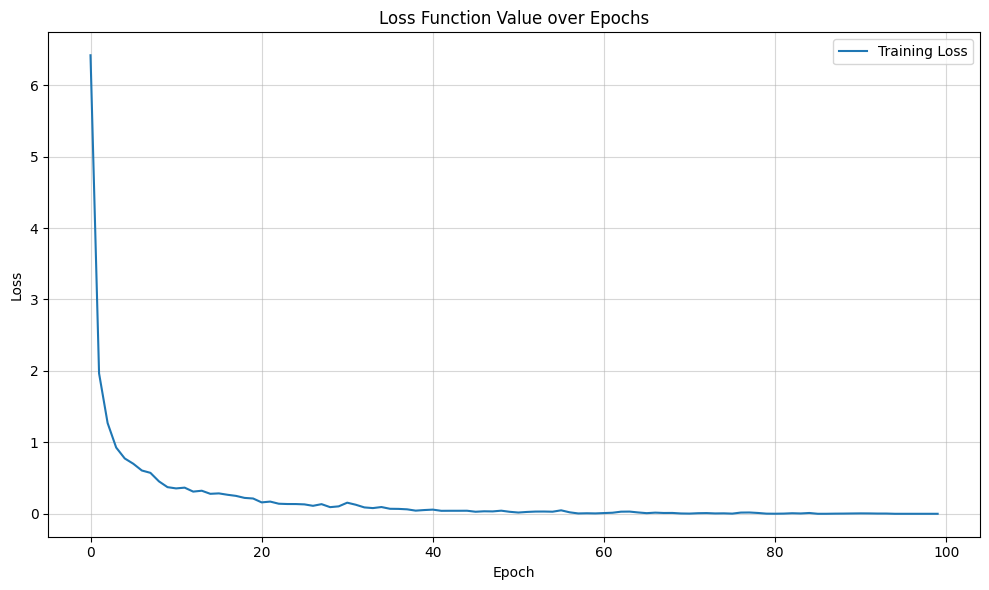

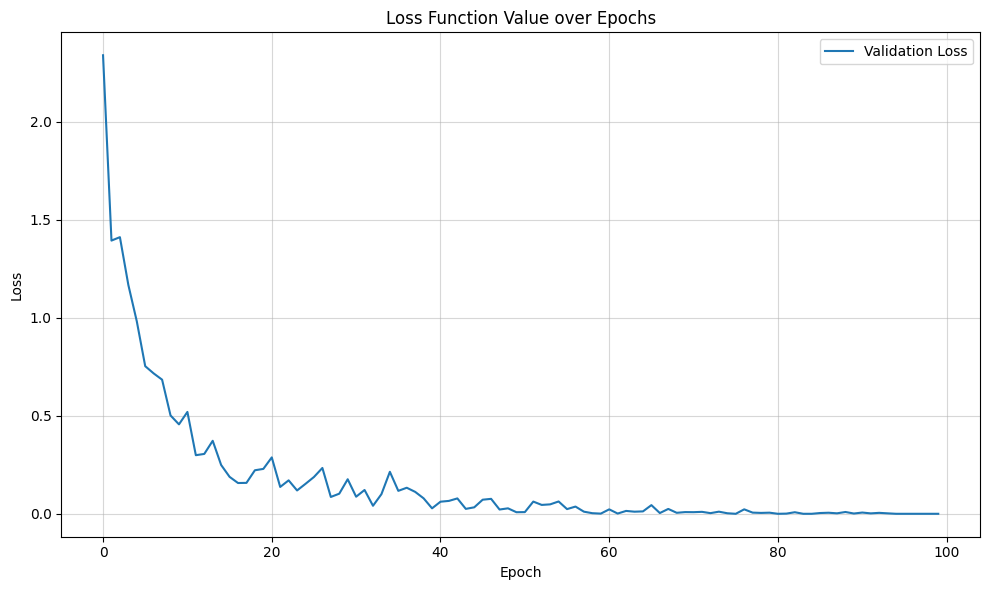

In [28]:
model.plot_loss_curve()

In [29]:
model.save_model("../../models/ffnn_model.pkl")

In [30]:
load = FFNN.load_model("../../models/ffnn_model.pkl")
y_pred = load.predict(X_test)
y_true = y_test

accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1))

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.77%
